In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing #used for data transformation

In [2]:
filename = 'wheat.csv'

In [3]:
wheat = pd.read_csv(filename)

In [4]:
wheat = pd.read_csv(filename)

In [7]:
#data Transformation 
wheat_tr = wheat.copy() # First make a copy of dataset then transform

In [5]:
#MinMax Scaler

#Creating a instance of Standard Scaler 
ms = preprocessing.MinMaxScaler()

In [8]:
tr_data = ms.fit_transform(wheat_tr.iloc[:,:])

In [9]:
wheat_tr.iloc[:,:] = tr_data

In [10]:
#difference btwn actual and transformde data
wheat.head()
wheat_tr.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,0.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,0.0


In [11]:
#Set y variable to its orignal format 
wheat_tr.type = wheat.type

In [12]:
wheat_tr.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1


In [13]:
#Shuffle the data 
wheat_tr = wheat_tr.sample(frac=1 )

In [14]:
wheat_tr.head(20)

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
8,0.570349,0.630165,0.604356,0.649775,0.595153,0.165767,0.668636,1
135,0.452314,0.464876,0.824864,0.325450,0.595153,0.368604,0.452979,2
175,0.019830,0.033058,0.461887,0.046171,0.136137,0.521122,0.267848,3
170,0.040604,0.121901,0.098004,0.239865,0.050606,0.776229,0.317085,3
126,0.761095,0.826446,0.559891,0.780405,0.687099,0.471453,0.779419,2
67,0.322946,0.388430,0.493648,0.399775,0.376336,0.188782,0.301822,1
178,0.084042,0.132231,0.355717,0.158221,0.091233,0.664539,0.237814,3
54,0.371105,0.452479,0.431942,0.474099,0.344262,0.093084,0.476613,1
193,0.021719,0.086777,0.158802,0.158221,0.000000,0.531524,0.280650,3
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


In [15]:
#Split the data in train and test
trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),
                                            wheat_tr.type,
                                            test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_12692/490317040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),


In [16]:
# Determine the best value for K
lst_k = np.arange(3,12,2);lst_k

array([ 3,  5,  7,  9, 11])

In [17]:
cv_accuracy = []

In [18]:
for k in lst_k:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,trainx,trainy,cv =10 , scoring='accuracy')
    cv_accuracy.append(scores.mean())
    

In [19]:
print(cv_accuracy)

[0.9233333333333335, 0.9295833333333334, 0.9233333333333335, 0.9166666666666667, 0.93]


In [20]:
#Find the best K
#(1)Using The list properties
k = lst_k[cv_accuracy.index(max(cv_accuracy))]
print("Best K = "+str(k))

Best K = 11


Text(0, 0.5, 'K values')

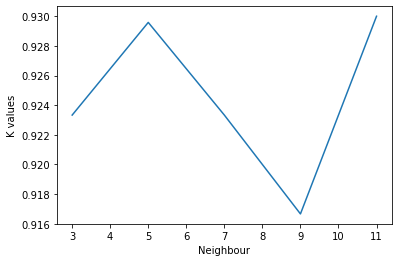

In [21]:
#(2)Plot the accuracy vs K values
plt.plot(lst_k,cv_accuracy)
plt.xlabel("Neighbour")
plt.ylabel("K values")

In [22]:
#build model and predcit using the best k 
m1 = neighbors.KNeighborsClassifier(n_neighbors=k).fit(trainx,trainy)

In [23]:
print(m1)

KNeighborsClassifier(n_neighbors=11)


In [24]:
#In above model the default model is Euclidean Distance formulae
#To change the formulae use HP  "metric"
m1 = neighbors.KNeighborsClassifier(n_neighbors=k,metric="euclidean").fit(trainx,trainy)

In [25]:
#predict 
p1 = m1.predict(testx)

In [26]:
#create data frame to store the result and print the confusion matrix
df = pd.DataFrame({'actual' : testy,'predicted':p1})

pd.crosstab(df.actual,df.predicted,margins = True)

predicted,1,2,3,All
actual,,,,
1,14,1,2,17
2,1,16,0,17
3,0,0,19,19
All,15,17,21,53


In [27]:
#Accuracy
print("Model Accuracy = {}".format(accuracy_score(df.actual,df.predicted)))

Model Accuracy = 0.9245283018867925


In [28]:
#Classification Report
print(classification_report(df.actual,df.predicted))

              precision    recall  f1-score   support

           1       0.93      0.82      0.87        17
           2       0.94      0.94      0.94        17
           3       0.90      1.00      0.95        19

    accuracy                           0.92        53
   macro avg       0.93      0.92      0.92        53
weighted avg       0.93      0.92      0.92        53

